In [4]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

def ZNSS(im_a,im_b):
    x,y=im_a.ravel(),im_b.ravel()
    #x,y=x-x.mean(),y-y.mean()
    tmp=np.sqrt((x**2).sum()*(y**2).sum())
    if tmp>0.:
        return (x*y).sum()/np.sqrt((x**2).sum()*(y**2).sum())
    else:
        return -1

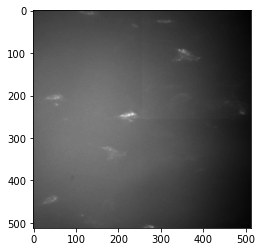

In [5]:
nx,ny=64,146

#X=np.load('0-64-60-124/spatial_X.npy').reshape((nx*ny,512*512))#[:nx,60:60+ny,:]
X=np.load('full_spatial_X.npy').reshape((nx*ny,512*512))#[:nx,60:60+ny,:]

#X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=512, n_y=512)

agglo_spatial = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')

agglo_spatial.fit(X)
#np.save("0-64-60-124/agglo_spatial",agglo_spatial)
#np.save("agglo_spatial",agglo_spatial)
#FA_spatial=np.load('0-64-60-124/spatial_features.npy')
FA_spatial=np.load('full_spatial_features.npy')
RS_spatial = agglo_spatial.inverse_transform(FA_spatial)
RS_spatial=RS_spatial.reshape((nx,ny,512,512))

plt.imshow(X[0].reshape((512,512)),cmap='gray')

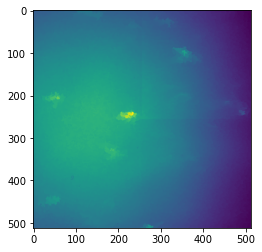

In [6]:
plt.imshow(RS_spatial[0,0])

0.9989123317511139


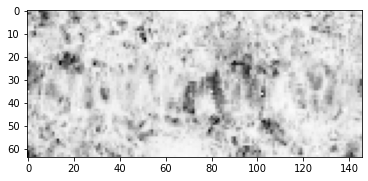

In [7]:
X_spatial=np.reshape(X,(nx,ny,512,512))
Cs_spatial=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        Cs_spatial[i,j]=ZNSS(RS_spatial[i,j],X_spatial[i,j])
plt.imshow(Cs_spatial,cmap='gray')

print(Cs_spatial.max())

In [8]:
X=np.load('full_frequency_X.npy').reshape((nx*ny,512*512))#[:nx,60:60+ny,:]

connectivity = grid_to_graph(n_x=512, n_y=512)

agglo_frequency = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')

agglo_frequency.fit(X)
#np.save("0-64-60-124/agglo_frequency",agglo_frequency)
#FA_frequency=np.load('0-64-60-124/frequency_features.npy')
FA_frequency=np.load('full_frequency_features.npy')

RS_frequency = agglo_frequency.inverse_transform(FA_frequency)
RS_frequency=RS_frequency.reshape((nx,ny,512,512))

0.9987406121414963


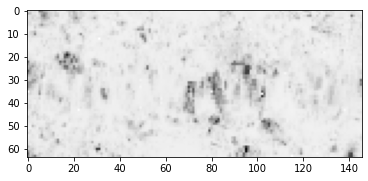

In [9]:
X_frequency=np.reshape(X,(nx,ny,512,512))
Cs_frequency=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        Cs_frequency[i,j]=ZNSS(fft.idstn(RS_frequency[i,j]),X_spatial[i,j])
plt.imshow(Cs_frequency,cmap='gray')

print(Cs_frequency.max())

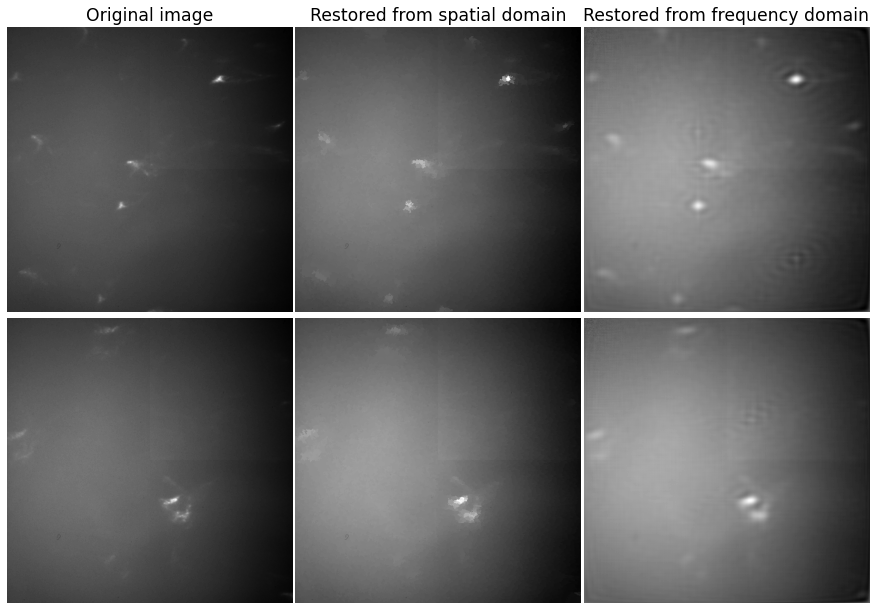

In [10]:


#spatial_features=np.load("spatial_features.npy")
#frequency_features=np.load("frequency_features.npy")

connectivity = grid_to_graph(n_x=512, n_y=512)



fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=2, ncols=3, left=0, right=1.,bottom=0,top=2./3., wspace=0.002,hspace=0.02)
i,j=2,3


ax1 = fig.add_subplot(gs[0,0])

ax1.axis('off')

im=ax1.imshow(X_spatial[i,j],cmap='gray')
ax1.set_title("Original image",size='xx-large')
########################################################################################

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=4096)#,linkage='complete')



ax2 = fig.add_subplot(gs[0,1])

ax2.axis('off')
im=ax2.imshow(RS_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
ax2.set_title("Restored from spatial domain",size='xx-large')
########################################################################################
ax3 = fig.add_subplot(gs[0,2])

ax3.axis('off')
im=ax3.imshow(fft.idstn(RS_frequency[i,j]),cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
ax3.set_title("Restored from frequency domain",size='xx-large')

########################################################################################

i,j=25,26

ax4 = fig.add_subplot(gs[1,0])

ax4.axis('off')
im=ax4.imshow(X_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax5 = fig.add_subplot(gs[1,1])

ax5.axis('off')
im=ax5.imshow(RS_spatial[i,j],cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################
ax6 = fig.add_subplot(gs[1,2])

ax6.axis('off')
im=ax6.imshow(fft.idstn(RS_frequency[i,j]),cmap='gray')
#ax1.text(0,0,"a",size='xx-large',verticalalignment='top',color='white')
#cbar = fig.colorbar(im, shrink=0.8,ax=ax1)
########################################################################################





plt.savefig('fig3.tif',format='tif',bbox_inches ='tight')

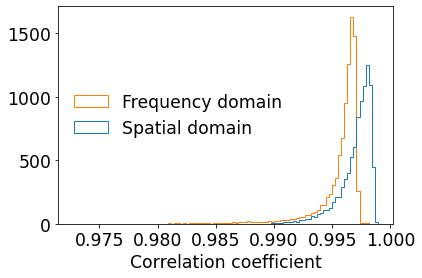

In [11]:
#ax7= fig.add_subplot(gs[2,:])
Cs_spatial_,Cs_frequency_=Cs_spatial.ravel(),Cs_frequency.ravel()
Cs_spatial_,Cs_frequency_=np.delete(Cs_spatial_,np.argmin(Cs_spatial_)),np.delete(Cs_frequency,np.argmin(Cs_frequency))
plt.xlabel("Correlation coefficient",size='xx-large')

plt.hist([Cs_spatial_,Cs_frequency_],label=['Spatial domain','Frequency domain'],histtype = 'step',bins=100)
leg = plt.legend(frameon=False,loc='center left',fontsize='xx-large')
plt.tick_params(axis='x', labelsize= "xx-large")
plt.tick_params(axis='y', labelsize= "xx-large")
plt.savefig('fig4.tif',format='tif',bbox_inches ='tight')